Outline of the work is as follows:

Load Data,
Feature Engineering,
Split Data,
Outlier Check with IQR,
Visualization,
Standardization,
Correlation Analysis,
KNN with Brute NN Search,
KNN with KDTree.











Traget Column is "Exited"

In [140]:
import numpy as np
import pandas as pd

import seaborn as sea

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [141]:
sea.set_style("darkgrid")

In [142]:
data = pd.read_csv("/content/customer_churn.csv")

data.head(10).style.set_precision(2). \
                    set_properties(**{"min-width": "80px"}). \
                    set_properties(**{"color": "#111111"}). \
                    set_properties(**{"text-align": "center"}). \
                    set_table_styles([
                          {"selector": "th",
                           "props": [("font-weight", "bold"),
                                     ("font-size", "12px"),
                                     ("text-align", "center")]},
                          {"selector": "tr:nth-child(even)",
                           "props": [("background-color", "#f2f2f2")]},
                          {"selector": "tr:nth-child(odd)",
                           "props": [("background-color", "#fdfdfd")]},
                          {"selector": "tr:hover",
                           "props": [("background-color", "#bcbcbc")]}])

<ipython-input-142-08b060f825e6>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.head(10).style.set_precision(2). \


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [143]:
data.columns= data.columns.str.lower()

In [144]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [146]:
data=data.drop(['rownumber','customerid','surname'],axis=1)

In [147]:
y=data.exited

In [148]:
X= data.drop(['exited'],axis=1)

In [149]:
# disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

data_X = data.loc[:, data.columns != "exited"]
data_Y = data[["exited"]]

print("\ndata_X info:\n")
data_X.info()
print("\ndata_Y info:\n")
data_Y.info()


data_X info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB

data_Y info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   exited  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.

Feature Engineering

In [150]:
for c in data_X.columns:

    print("Feature name: {}".format(c))
    print("Unique values:\n")
    print(data_X[c].unique())
    print("\n--------------------------------------------------\n")

Feature name: creditscore
Unique values:

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 

In [151]:
data_X= pd.get_dummies(data_X,drop_first=True)

In [152]:
data_X.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [153]:
from sklearn.model_selection import train_test_split

Split Data

In [154]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    stratify=data_Y,
                                                    random_state=0)

train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

Outlier Check with IQR

In [155]:
num = ["creditscore", "age","numofproducts","estimatedsalary"]

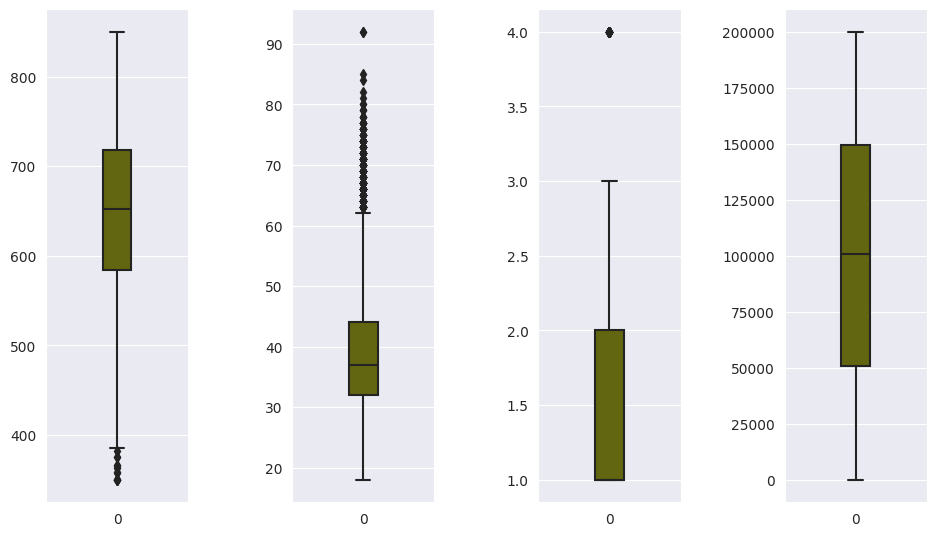

In [156]:
fig, axes = plt.subplots(1, 4, figsize=(10,6))
for i, c in enumerate(train_X[num]):
    sea.boxplot(train_X[c], orient="v", color = "#6f7501",
                                width = 0.2, ax=axes[i])

fig.tight_layout(pad=3.0)

<ipython-input-157-48061da5d4d0>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y, x = np.int(i/2), i%2
<ipython-input-157-48061da5d4d0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(train_X.loc[

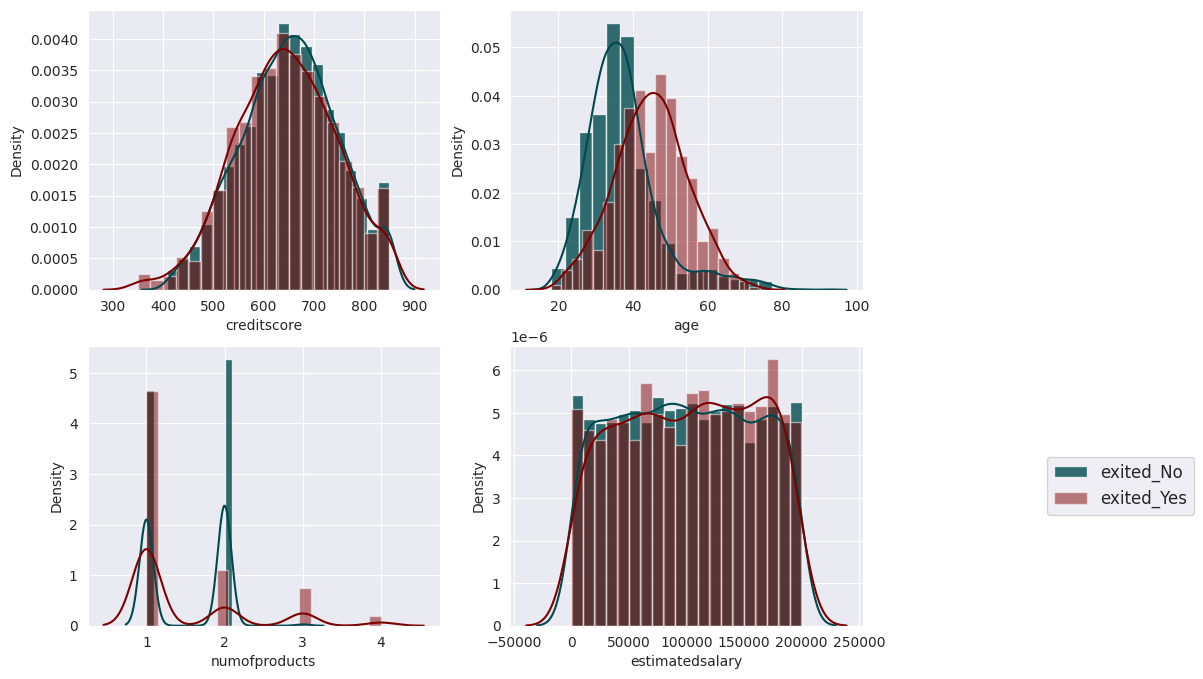

In [157]:
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

for i, c in enumerate(train_X[num]):
    y, x = np.int(i/2), i%2
    ax = fig.add_subplot(gs[y,x])
    sea.distplot(train_X.loc[train_Y["exited"]==0,c], kde = True,
                 color = "#004a4d", hist_kws = dict(alpha=0.8),
                 bins=20, label="exited_No", ax=ax);
    sea.distplot(train_X.loc[train_Y["exited"]==1,c], kde = True,
                 color = "#7d0101", hist_kws = dict(alpha=0.5),
                 bins=20, label="exited_Yes", ax=ax);

ax.legend(loc="center left", bbox_to_anchor=(1.5,0.5),
          prop={"size":12});

Standardisation

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc=StandardScaler()

In [160]:
X= pd.get_dummies(X,drop_first=True)

In [161]:
type(train_X)

pandas.core.frame.DataFrame

In [162]:
train_X.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,531,47,6,0.00,1,0,0,194998.34,0,0,0
1,724,36,6,94615.11,2,1,1,10627.21,1,0,1
2,484,29,4,130114.39,1,1,0,164017.89,0,0,0
3,655,37,6,109093.41,2,1,0,1775.52,0,0,1
4,465,33,5,0.00,2,0,1,78698.09,0,0,1


In [163]:
scaler = StandardScaler()

# fit to train_X
scaler.fit(train_X)

# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = test_X.columns)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = train_X.columns)

In [164]:
test_X=pd.DataFrame(test_X,columns=train_X.columns)

<ipython-input-165-ea135d3a8255>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


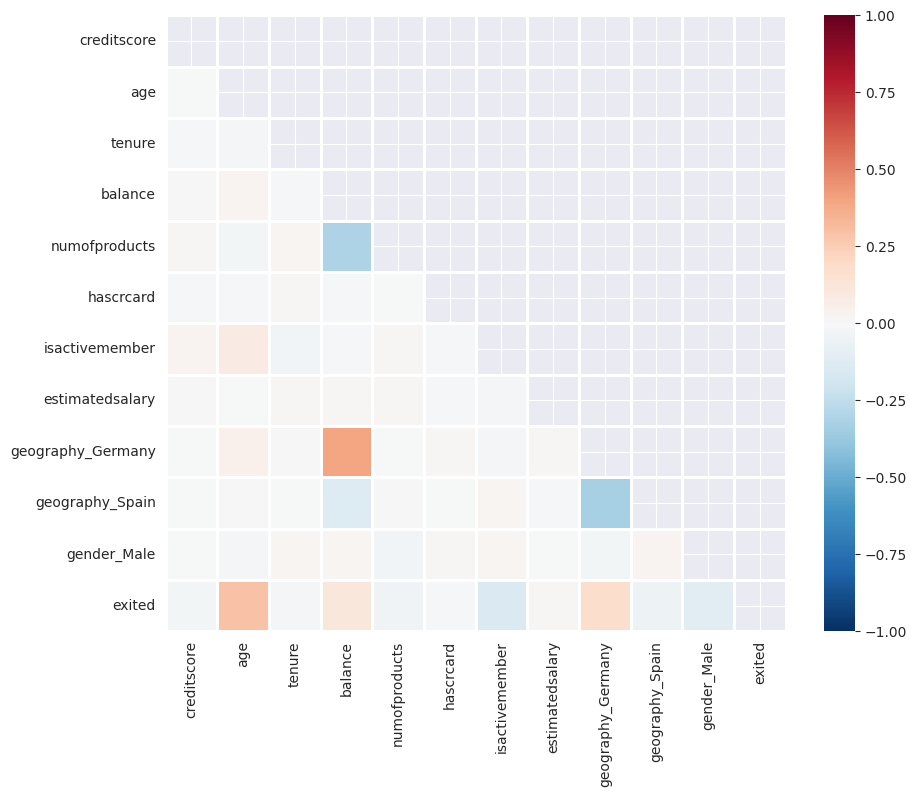

In [165]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=False, fmt=".1f", vmin=-1,
            vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");

KNN with Brute NN Search
We will try KNN first with brute nearest neighbor search. We use grid search to find the optimal parameters and use stratified 5-fold for cross validation. Minkowski is used as distance metric and its value is searched (1 or 2). When p equals 1, Minkowski is Manhattan distance and when p equals 2, it is Euclidean distance. During grid search, model performance with each parameter combination is measured on cross validation folds. The parameters giving the highest performance is returned as best parameter set.

In [166]:
drop = ["geography_Germany",
        "geography_Spain",
        "gender_Male"]

for d in drop:
    train_X.drop(d, axis=1, inplace=True)
    test_X.drop(d, axis=1, inplace=True)

np_train_X = train_X.values
np_train_Y = train_Y.values.ravel()
np_test_X = test_X.values
np_test_Y = test_Y.values.ravel()

In [167]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(30, 50, 2),
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["brute"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
)

gscv.fit(np_train_X,np_train_Y)
print("Best parameters {}".format(gscv.best_params_))

Best parameters {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 30, 'p': 2.0}


In [168]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_train_X, np_train_Y)
y_pred = knn_cls.predict(np_test_X)
print(classification_report(np_test_Y, y_pred,
                            target_names=["exited No", "exited Yes"]))

              precision    recall  f1-score   support

   exited No       0.84      0.99      0.91      1593
  exited Yes       0.85      0.24      0.38       407

    accuracy                           0.84      2000
   macro avg       0.84      0.62      0.64      2000
weighted avg       0.84      0.84      0.80      2000



KNN with KDTree
In nearest neighbor search, data structures like kdtree can be incorporated instead of using KNN in its original form with brute search. kdtree learns which training sample is residing on which part of the feature space. On inference, it takes you to the close proximity of test sample and gives you the neighbors. kdtree allows you to search multidimensional space efficiently.



In [169]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(40, 60, 2),
    "leaf_size": [1, 2, 3],
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["kd_tree"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
    )

gscv.fit(np_train_X, np_train_Y)
print("Best parameters {}".format(gscv.best_params_))

Best parameters {'algorithm': 'kd_tree', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 42, 'p': 1.0}


In [170]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_train_X, np_train_Y)
y_pred = knn_cls.predict(np_test_X)
print(classification_report(np_test_Y, y_pred,
                            target_names=["exited No", "exited Yes"]))

              precision    recall  f1-score   support

   exited No       0.83      0.99      0.90      1593
  exited Yes       0.86      0.22      0.35       407

    accuracy                           0.83      2000
   macro avg       0.84      0.61      0.63      2000
weighted avg       0.84      0.83      0.79      2000

